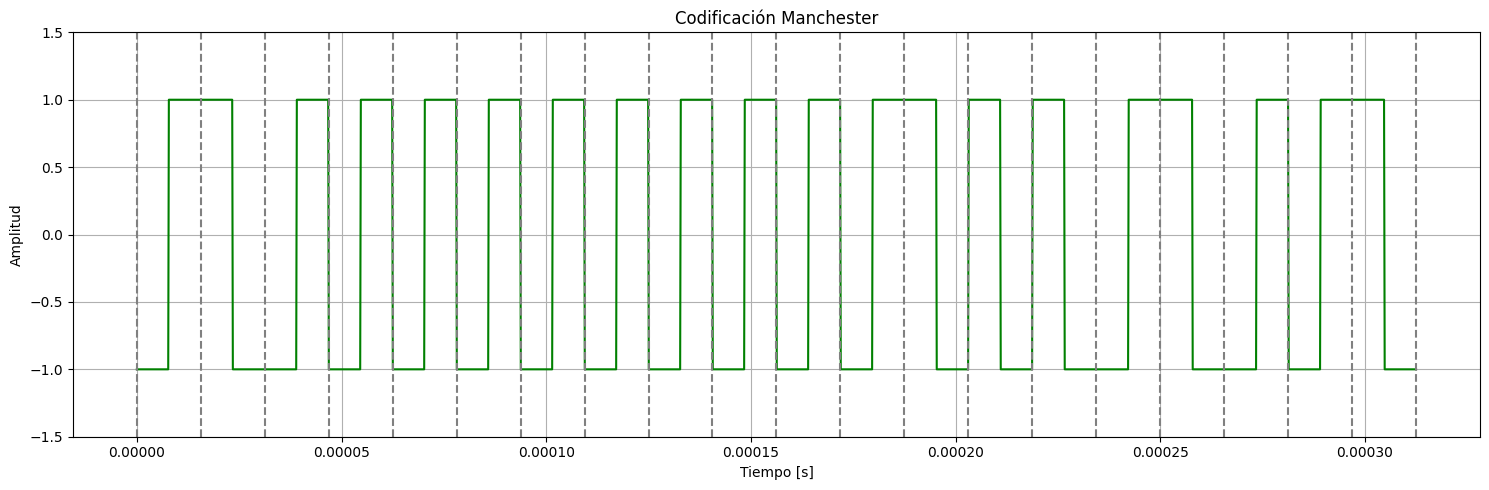

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de configuración
V_T = 64e3  # Tasa de bits (64 kbits/seg)
V = 1  # Voltaje de pico
bit_duration = 1 / V_T  # Duración de un bit

# Codificación binaria de 8079 con 5 bits por dígito
bin_8079 = '01000 00000 00111 01001'
bits = [int(b) for b in bin_8079.replace(' ', '')]
n_bits = len(bits)

# Definición del tiempo total de la señal
t = np.linspace(0, n_bits * bit_duration, n_bits * 100)

# Generar la señal Manchester
def manchester(bits, V, bit_duration, t):
    signal = np.zeros_like(t)
    for i, bit in enumerate(bits):
        if bit == 1:
            signal[int(i*100):int((i+0.5)*100)] = V
            signal[int((i+0.5)*100):int((i+1)*100)] = -V
        else:
            signal[int(i*100):int((i+0.5)*100)] = -V
            signal[int((i+0.5)*100):int((i+1)*100)] = V
    return signal

manchester_signal = manchester(bits, V, bit_duration, t)

# Graficar la señal Manchester con líneas verticales para separar cada bit
plt.figure(figsize=(15, 5))
plt.plot(t, manchester_signal, label='Manchester', color='green')
plt.title('Codificación Manchester')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.ylim([-1.5, 1.5])

# Añadir líneas verticales para separar visualmente cada bit
for i in range(n_bits + 1):
    plt.axvline(i * bit_duration, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


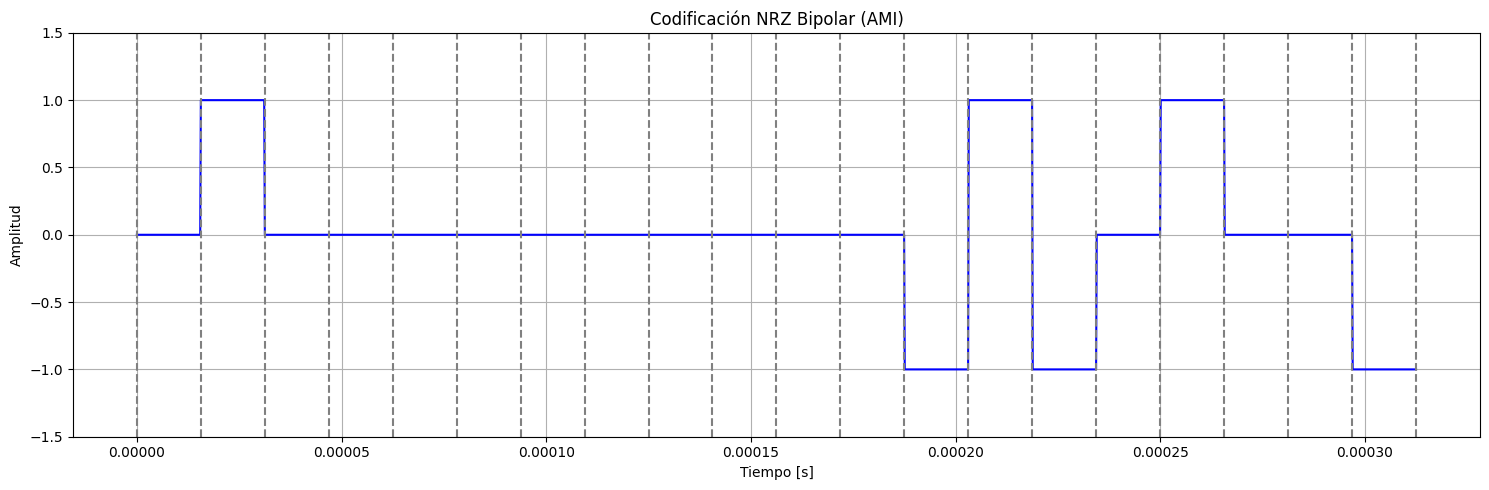

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de configuración
V_T = 64e3  # Tasa de bits (64 kbits/seg)
V = 1  # Voltaje de pico
bit_duration = 1 / V_T  # Duración de un bit

# Codificación binaria de 8079 con 5 bits por dígito
bin_8079 = '01000 00000 00111 01001'
bits = [int(b) for b in bin_8079.replace(' ', '')]
n_bits = len(bits)

# Definición del tiempo total de la señal
t = np.linspace(0, n_bits * bit_duration, n_bits * 100)

# Generar la señal NRZ Bipolar (AMI)
def nrz_bipolar_ami(bits, V, bit_duration, t):
    signal = np.zeros_like(t)
    last_level = -V
    for i, bit in enumerate(bits):
        if bit == 1:
            last_level = -last_level
            signal[int(i*100):int((i+1)*100)] = last_level
    return signal

nrz_bipolar_ami_signal = nrz_bipolar_ami(bits, V, bit_duration, t)

# Graficar la señal NRZ Bipolar (AMI) con líneas verticales para separar cada bit
plt.figure(figsize=(15, 5))
plt.plot(t, nrz_bipolar_ami_signal, label='NRZ Bipolar (AMI)', color='blue')
plt.title('Codificación NRZ Bipolar (AMI)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.ylim([-1.5, 1.5])

# Añadir líneas verticales para separar visualmente cada bit
for i in range(n_bits + 1):
    plt.axvline(i * bit_duration, color='gray', linestyle='--')

plt.tight_layout()
plt.show()
